In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures
# local
import wrangle as w
import explore as e
import modeling as m

In [2]:
# 52,441 rows to 50,041, drop less than 5%

In [3]:
df = w.get_zillow()
df

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id.1,logerror,transactiondate
0,17173851,787,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,...,64712.0,2016.0,17519.0,781.00,NaN,NaN,6.111004e+13,389.0,0.088469,2017-01-03
1,10821119,1702,NaN,NaN,NaN,2.0,2.0,NaN,6.0,2.0,...,381638.0,2016.0,274127.0,4692.27,NaN,NaN,6.037131e+13,402.0,0.025629,2017-01-03
2,11007640,2412,1.0,NaN,NaN,2.0,3.0,NaN,8.0,2.0,...,305307.0,2016.0,160505.0,3887.80,NaN,NaN,6.037106e+13,2699.0,0.020360,2017-01-12
3,11457850,3770,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,93146.0,2016.0,54446.0,1246.18,NaN,NaN,6.037276e+13,2229.0,0.054233,2017-01-11
4,12591550,8197,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,482242.0,2016.0,385591.0,6098.62,NaN,NaN,6.037544e+13,3038.0,-0.016170,2017-01-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52436,12885754,2976765,NaN,NaN,NaN,1.0,3.0,NaN,4.0,1.0,...,200214.0,2016.0,106817.0,2629.33,NaN,NaN,6.037403e+13,42657.0,0.515289,2017-06-01
52437,13869000,2977815,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,...,215695.0,2016.0,80652.0,2607.04,NaN,NaN,6.059002e+13,32297.0,0.009512,2017-05-02
52438,13890509,2977914,NaN,NaN,NaN,4.0,3.0,NaN,NaN,4.0,...,1389962.0,2016.0,1118935.0,14935.72,NaN,NaN,6.059063e+13,28537.0,-0.031048,2017-04-21
52439,17246810,2980979,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,...,403678.0,2016.0,201839.0,4880.90,NaN,NaN,6.111008e+13,8396.0,-0.031665,2017-02-07


In [4]:
df = w.prep4ex_zillow(df)
df

,year,baths,beds,roomcnt,fireplacecnt,garagecarcnt,hashottuborspa,pools,area,stories,county,latitude,longitude,prop_value
0,1952,2.0,4,6.0,1.0,0.0,0.0,0.0,1848,1.0,Ventura,34153345.0,-119194015.0,64712
1,1952,2.0,2,0.0,0.0,0.0,0.0,1.0,1430,0.0,LA,34217763.0,-118504217.0,381638
2,1976,2.0,3,0.0,0.0,0.0,0.0,0.0,1572,0.0,LA,34326995.0,-118426172.0,305307
3,1941,2.0,3,0.0,0.0,0.0,0.0,0.0,1412,0.0,LA,33962085.0,-118393253.0,93146
4,1959,2.0,3,0.0,0.0,0.0,0.0,0.0,1352,0.0,LA,33833583.0,-118295434.0,482242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52436,1948,1.0,3,0.0,0.0,0.0,0.0,0.0,1021,0.0,LA,34041973.0,-117761243.0,200214
52437,1976,2.0,4,7.0,0.0,2.0,0.0,0.0,1554,1.0,Orange,33868442.0,-117974576.0,215695
52438,2001,4.0,3,5.0,0.0,3.0,0.0,0.0,2880,1.0,Orange,33624412.0,-117921232.0,1389962
52439,1986,2.5,3,5.0,1.0,2.0,0.0,0.0,1376,2.0,Ventura,34253728.0,-118732673.0,403678


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51046 entries, 0 to 52440
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            51046 non-null  int64  
 1   baths           51046 non-null  float64
 2   beds            51046 non-null  int64  
 3   roomcnt         51046 non-null  float64
 4   fireplacecnt    51046 non-null  float64
 5   garagecarcnt    51046 non-null  float64
 6   hashottuborspa  51046 non-null  float64
 7   pools           51046 non-null  float64
 8   area            51046 non-null  int64  
 9   stories         51046 non-null  float64
 10  county          51046 non-null  object 
 11  latitude        51046 non-null  float64
 12  longitude       51046 non-null  float64
 13  prop_value      51046 non-null  int64  
dtypes: float64(9), int64(4), object(1)
memory usage: 5.8+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,51046.0,1.963122e+03,22.890992,1878.0,1.950000e+03,1960.0,1.978000e+03,2016.0
baths,51046.0,2.244476e+00,0.916232,0.0,2.000000e+00,2.0,3.000000e+00,10.0
beds,51046.0,3.279415e+00,0.912294,0.0,3.000000e+00,3.0,4.000000e+00,11.0
roomcnt,51046.0,1.906594e+00,3.143664,0.0,0.000000e+00,0.0,5.000000e+00,14.0
fireplacecnt,51046.0,1.664773e-01,0.450406,0.0,0.000000e+00,0.0,0.000000e+00,4.0
garagecarcnt,51046.0,6.655174e-01,0.963036,0.0,0.000000e+00,0.0,2.000000e+00,14.0
hashottuborspa,51046.0,2.701485e-02,0.162128,0.0,0.000000e+00,0.0,0.000000e+00,1.0
pools,51046.0,2.030913e-01,0.402304,0.0,0.000000e+00,0.0,0.000000e+00,1.0
area,51046.0,1.853255e+03,829.467608,128.0,1.260000e+03,1640.0,2.252000e+03,5999.0
stories,51046.0,3.957019e-01,0.695341,0.0,0.000000e+00,0.0,1.000000e+00,6.0


## MVP Time

In [7]:
df = df[['baths','beds','area','prop_value']]
df

,baths,beds,area,prop_value
0,2.0,4,1848,64712
1,2.0,2,1430,381638
2,2.0,3,1572,305307
3,2.0,3,1412,93146
4,2.0,3,1352,482242
...,...,...,...,...
52436,1.0,3,1021,200214
52437,2.0,4,1554,215695
52438,4.0,3,2880,1389962
52439,2.5,3,1376,403678


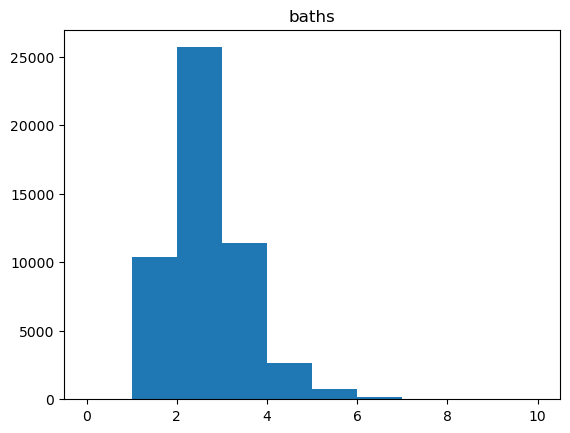

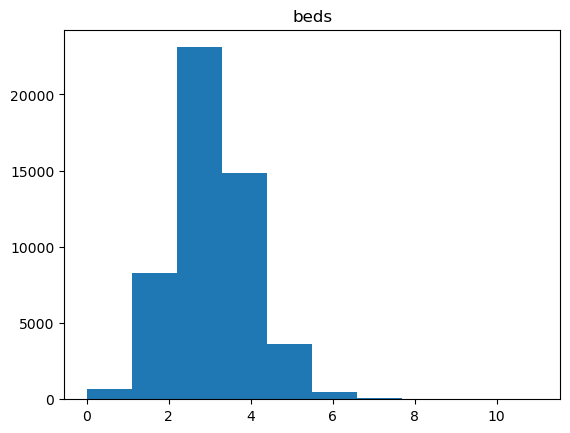

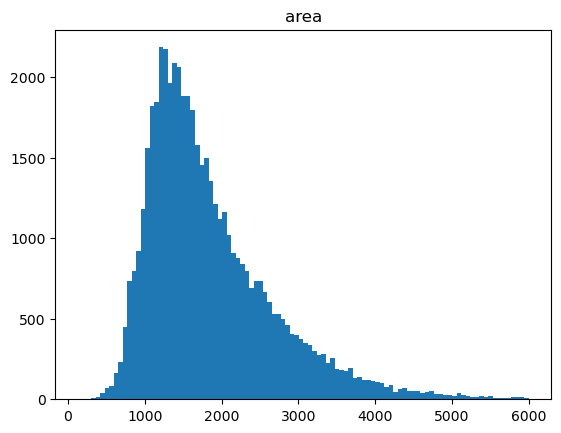

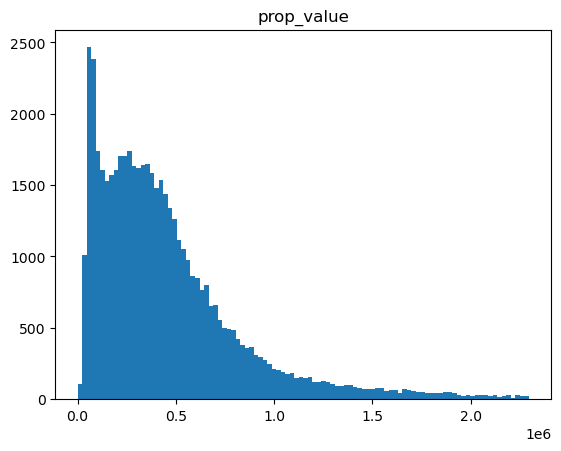

In [8]:
for col in ['baths','beds']:
    plt.hist(df[col])
    plt.title(col)
    plt.show()
for col in ['area','prop_value']:
    plt.hist(df[col],100)
    plt.title(col)
    plt.show()

In [9]:
train,val,test = w.split_data(df)
train

,baths,beds,area,prop_value
9568,2.0,3,1001,265150
18363,2.0,3,1580,1275356
2877,2.0,3,1128,498221
30380,2.0,4,1188,105337
2657,2.0,3,1470,399808
...,...,...,...,...
18920,2.5,3,1410,452000
26843,2.0,3,1360,583768
26089,2.5,4,1725,294332
9979,2.0,3,1432,53049


In [10]:
train.describe()

,baths,beds,area,prop_value
count,30627.000000,30627.000000,30627.000000,3.062700e+04
mean,2.240899,3.277957,1850.301597,4.544017e+05
std,0.919029,0.912389,833.013077,3.762460e+05
min,0.000000,0.000000,128.000000,1.000000e+03
25%,2.000000,3.000000,1257.000000,1.908235e+05
50%,2.000000,3.000000,1637.000000,3.644180e+05
75%,3.000000,4.000000,2244.000000,5.944720e+05
max,10.000000,11.000000,5999.000000,2.294763e+06


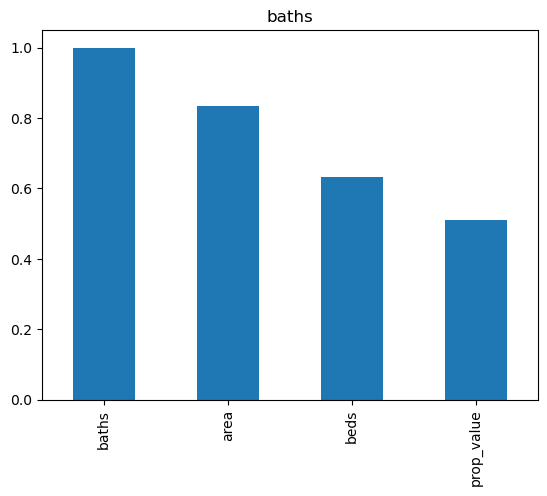

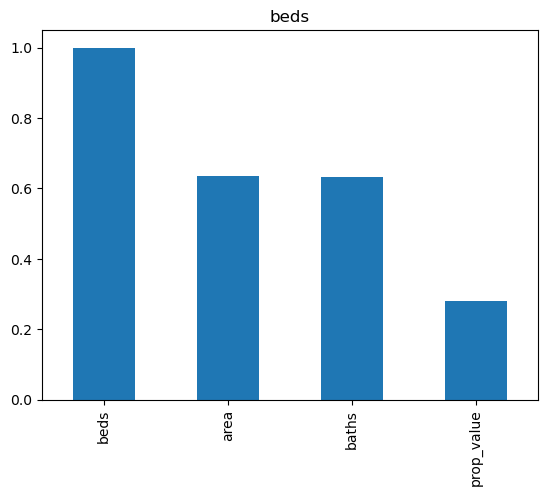

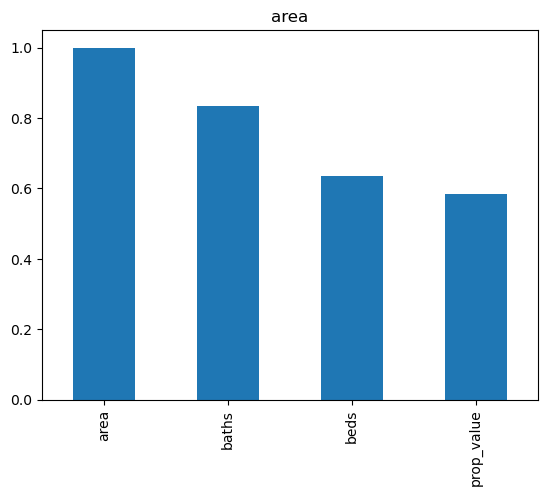

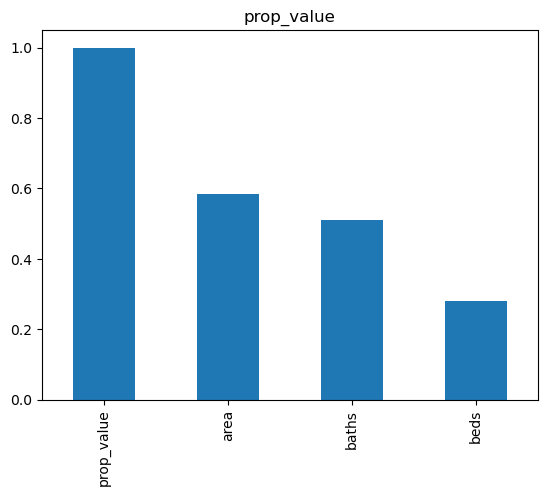

In [11]:
cols = train.columns.to_list()
for col in cols:
    train.corr()[col].sort_values(ascending = False).plot(kind='bar')
    plt.title(col)
    plt.show()

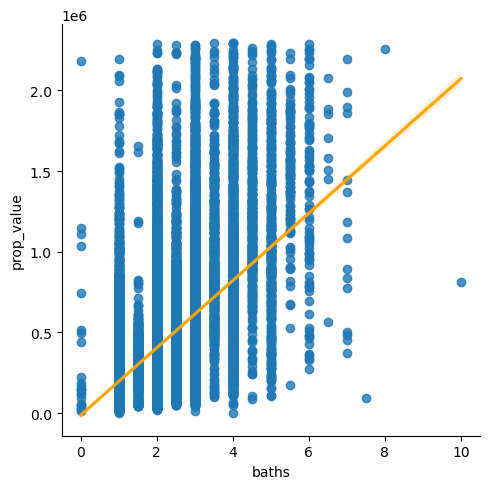

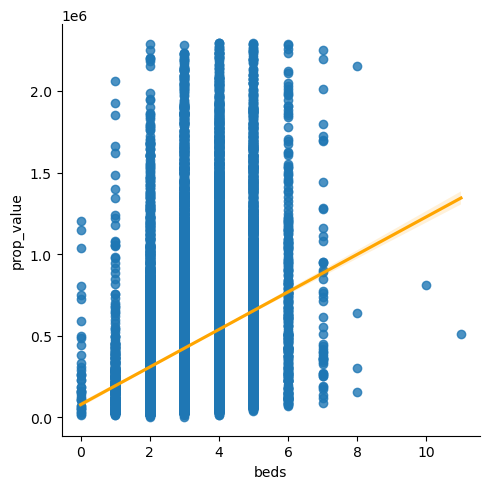

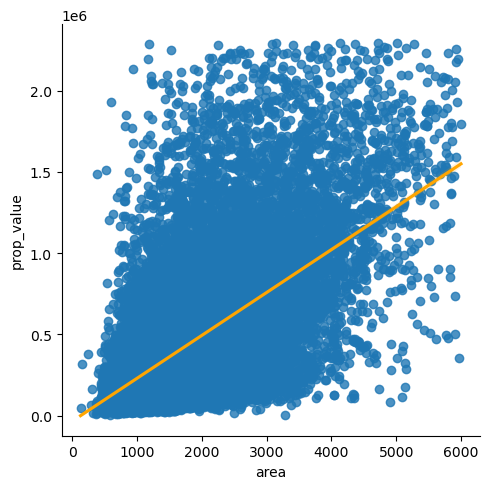

In [12]:
target = 'prop_value'
for i in train.drop(columns=target):
    sns.lmplot(x=i,y=target,data=train,line_kws={'color':'orange'})
    # plt.ylim(0,2_000_000)
    plt.show()

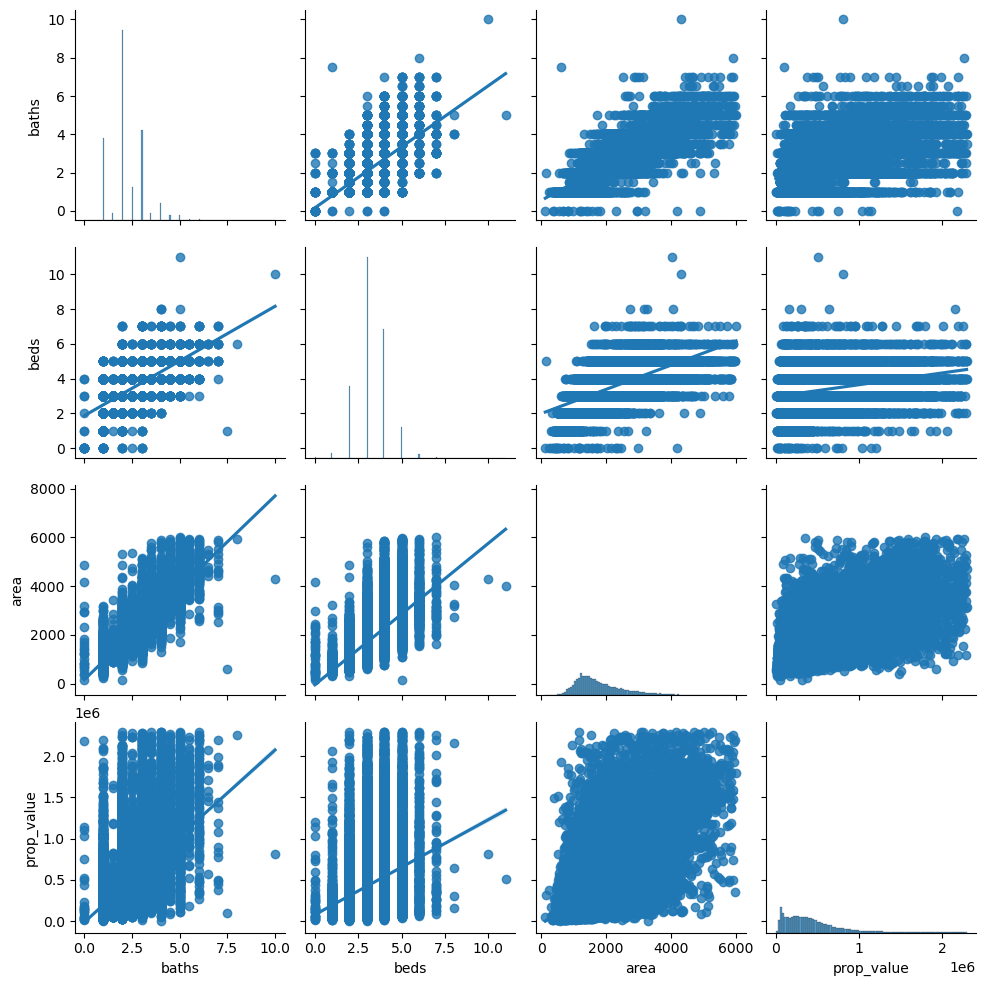

In [13]:
sns.pairplot(data=train,kind='reg')
plt.show()

In [14]:
import itertools
cols = train.columns.to_list()
def pear(train, x, y, alt_hyp='two-sided'):
    r,p = stats.spearmanr(train[x], train[y], alternative=alt_hyp)
    print(f"Spearman's R: {x} and {y}\n", f'r = {r}, p = {p}')
for col in itertools.permutations(cols,2):
    # cont & cont
    pear(train,col[0],col[1])

Spearman's R: baths and beds
 r = 0.6294059596079739, p = 0.0
Spearman's R: baths and area
 r = 0.8284031321875652, p = 0.0
Spearman's R: baths and prop_value
 r = 0.4600307927313944, p = 0.0
Spearman's R: beds and baths
 r = 0.6294059596079739, p = 0.0
Spearman's R: beds and area
 r = 0.6618969743830446, p = 0.0
Spearman's R: beds and prop_value
 r = 0.2779446490732613, p = 0.0
Spearman's R: area and baths
 r = 0.8284031321875652, p = 0.0
Spearman's R: area and beds
 r = 0.6618969743830446, p = 0.0
Spearman's R: area and prop_value
 r = 0.5017813399669965, p = 0.0
Spearman's R: prop_value and baths
 r = 0.4600307927313944, p = 0.0
Spearman's R: prop_value and beds
 r = 0.2779446490732612, p = 0.0
Spearman's R: prop_value and area
 r = 0.5017813399669964, p = 0.0


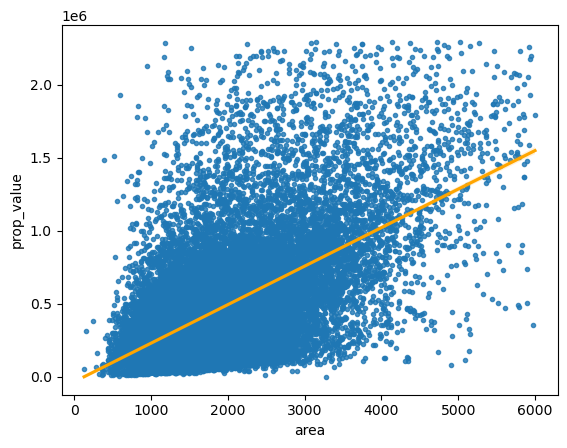

In [15]:
# Does area correlate with prop_value?
# H0 = No correlation
# Ha = Yes correlation
sns.regplot(data=train,x='area',y='prop_value',marker='.',line_kws={'color':'orange'})
plt.show()

In [16]:
pear(train,'area','prop_value')

Spearman's R: area and prop_value
 r = 0.5017813399669965, p = 0.0


In [17]:
# less than alpha = .05
# yes correlation

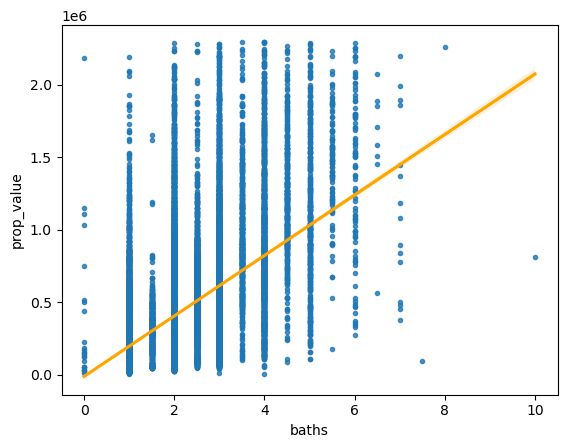

In [18]:
# Does baths correlate with prop_value?
# H0 = No correlation
# Ha = Yes correlation
sns.regplot(data=train,x='baths',y='prop_value',marker='.',line_kws={'color':'orange'})
plt.show()

In [19]:
pear(train,'baths','prop_value')

Spearman's R: baths and prop_value
 r = 0.4600307927313944, p = 0.0


In [20]:
# less than alpha = .05
# yes correlation

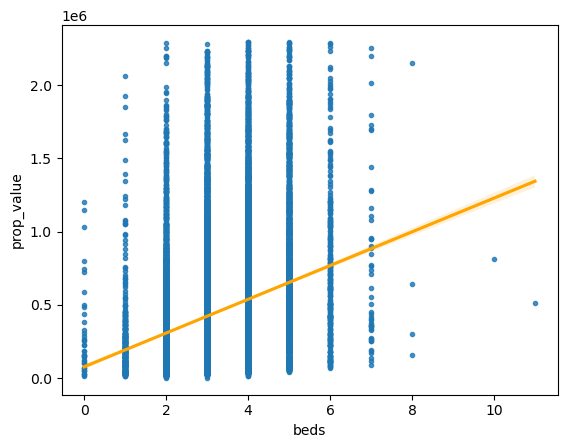

In [21]:
# Does beds correlate with prop_value?
# H0 = No correlation
# Ha = Yes correlation
sns.regplot(data=train,x='beds',y='prop_value',marker='.',line_kws={'color':'orange'})
plt.show()

In [22]:
pear(train,'beds','prop_value')

Spearman's R: beds and prop_value
 r = 0.2779446490732613, p = 0.0


In [23]:
# less than alpha = .05
# yes correlation

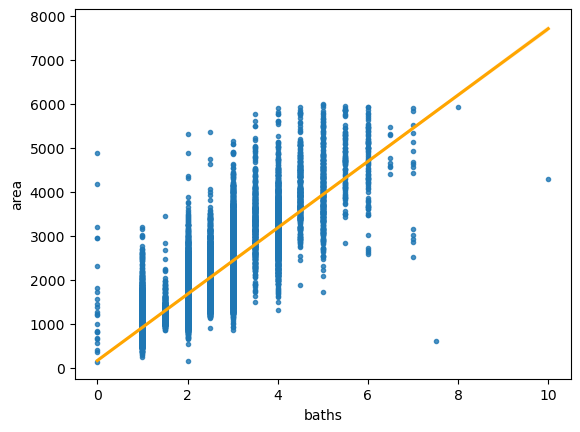

In [24]:
# Does baths correlate with area?
# H0 = No correlation
# Ha = Yes correlation
sns.regplot(data=train,x='baths',y='area',marker='.',line_kws={'color':'orange'})
plt.show()

In [25]:
pear(train,'baths','area')

Spearman's R: baths and area
 r = 0.8284031321875652, p = 0.0


In [26]:
# less than alpha = .05
# yes correlation

In [27]:
train = train.assign(rooms=(train.beds+train.baths))
val = val.assign(rooms=(val.beds+val.baths))
test = test.assign(rooms=(test.beds+test.baths))

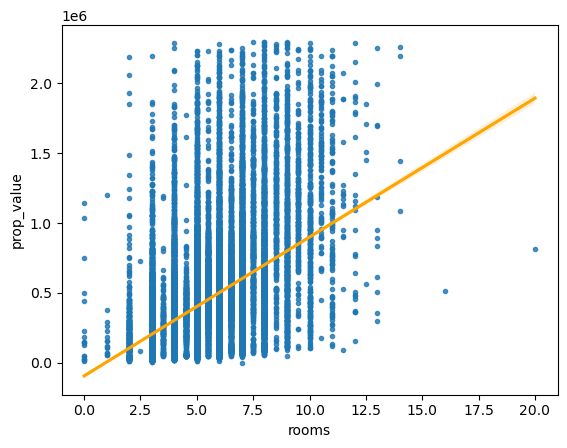

In [28]:
# Does baths correlate with area?
# H0 = No correlation
# Ha = Yes correlation
sns.regplot(data=train,x='rooms',y='prop_value',marker='.',line_kws={'color':'orange'})
plt.show()

In [29]:
pear(train,'rooms','prop_value')

Spearman's R: rooms and prop_value
 r = 0.40240576705209985, p = 0.0


In [30]:
# less than alpha = .05
# yes correlation

In [31]:
train.prop_value.mean()

454401.6769190584

In [32]:
X_train,X_val,X_test = train.drop(columns=['prop_value']),val.drop(columns=['prop_value']),test.drop(columns=['prop_value'])
Xs_train,Xs_val,Xs_test = w.std_zillow(X_train,X_val,X_test)
y_train,y_val,y_test = train[['prop_value']],val[['prop_value']],test[['prop_value']]

In [33]:
y_train.mean()[0]

454401.6769190584

In [34]:
def metrics_reg(y, yhat):
    """
    send in y_true, y_pred & returns RMSE, R2
    """
    rmse = mean_squared_error(y, yhat, squared=False)
    r2 = r2_score(y, yhat)
    return rmse, r2

In [35]:
def reg_mods(Xtr,ytr,Xv,yv,features=None,alpha=1,degree=2,power=2):
    '''
    Input X_train,y_train,X_val,y_val, list of features, and alpha, degree, and power
    so that function will run through linear regression, lasso lars,
    polynomial feature regression, and tweedie regressor (glm)
    - diff feature combos
    - diff hyper params
    - output as df
    '''
    if features is None:
        features = Xtr.columns.to_list()
    # baseline as mean
    pred_mean = ytr.mean()[0]
    ytr_p = ytr.assign(pred_mean=pred_mean)
    yv_p = yv.assign(pred_mean=pred_mean)
    rmse_tr = mean_squared_error(ytr,ytr_p.pred_mean)**.5
    rmse_v = mean_squared_error(yv,yv_p.pred_mean)**.5
    r2_tr = r2_score(ytr, ytr_p.pred_mean)
    r2_v = r2_score(yv, yv_p.pred_mean)
    output = {
            'model':'bl_mean',
            'features':'None',
            'params':'None',
            'rmse_tr':rmse_tr,
            'rmse_v':rmse_v,
            'r2_tr':r2_tr,
            'r2_v':r2_v
        }
    metrics = [output]
    # create iterable for feature combos
    for r in range(1,(len(features)+1)):
        # cycle through feature combos for linear reg
        for feature in itertools.combinations(features,r):
            f = list(feature)
            # linear regression
            lr = LinearRegression()
            lr.fit(Xtr[f],ytr)
            # metrics
            pred_lr_tr = lr.predict(Xtr[f])
            rmse_tr,r2_tr = metrics_reg(ytr,pred_lr_tr)
            pred_lr_v = lr.predict(Xv[f])
            rmse_v,r2_v = metrics_reg(yv,pred_lr_v)
            # table-ize
            output ={
                    'model':'LinearRegression',
                    'features':f,
                    'params':'None',
                    'rmse_tr':rmse_tr,
                    'rmse_v':rmse_v,
                    'r2_tr':r2_tr,
                    'r2_v':r2_v
                }
            metrics.append(output)
        # cycle through feature combos and alphas for lasso lars
        for feature,a in itertools.product(itertools.combinations(features,r),alpha):
            f = list(feature)
            # lasso lars
            ll = LassoLars(alpha=a,normalize=False,random_state=42)
            ll.fit(Xtr[f],ytr)
            # metrics
            pred_ll_tr = ll.predict(Xtr[f])
            rmse_tr,r2_tr = metrics_reg(ytr,pred_ll_tr)
            pred_ll_v = ll.predict(Xv[f])
            rmse_v,r2_v = metrics_reg(yv,pred_ll_v)
            # table-ize
            output ={
                    'model':'LassoLars',
                    'features':f,
                    'params':f'alpha={a}',
                    'rmse_tr':rmse_tr,
                    'rmse_v':rmse_v,
                    'r2_tr':r2_tr,
                    'r2_v':r2_v
                }
            metrics.append(output)
        # cycle through feature combos and degrees for polynomial feature reg
        for feature,d in itertools.product(itertools.combinations(features,r),degree):
            f = list(feature)
            # polynomial feature regression
            pf = PolynomialFeatures(degree=d)
            Xtr_pf = pf.fit_transform(Xtr[f])
            Xv_pf = pf.transform(Xv[f])
            lp = LinearRegression()
            lp.fit(Xtr_pf,ytr)
            # metrics
            pred_lp_tr = lp.predict(Xtr_pf)
            rmse_tr,r2_tr = metrics_reg(ytr,pred_lp_tr)
            pred_lp_v = lp.predict(Xv_pf)
            rmse_v,r2_v = metrics_reg(yv,pred_lp_v)
            # table-ize
            output ={
                    'model':'PolynomialFeature',
                    'features':f,
                    'params':f'degree={d}',
                    'rmse_tr':rmse_tr,
                    'rmse_v':rmse_v,
                    'r2_tr':r2_tr,
                    'r2_v':r2_v
                }
            metrics.append(output)
        # cycle through feature combos, alphas, and powers for tweedie reg
        for feature,a,p in itertools.product(itertools.combinations(features,r),alpha,power):
            f = list(feature)
            # tweedie regressor glm
            lm = TweedieRegressor(power=p,alpha=a)
            lm.fit(Xtr[f],ytr.prop_value)
            # metrics
            pred_lm_tr = lm.predict(Xtr[f])
            rmse_tr,r2_tr = metrics_reg(ytr,pred_lm_tr)
            pred_lm_v = lm.predict(Xv[f])
            rmse_v,r2_v = metrics_reg(yv,pred_lm_v)
            # table-ize
            output ={
                    'model':'TweedieRegressor',
                    'features':f,
                    'params':f'power={p},alpha={a}',
                    'rmse_tr':rmse_tr,
                    'rmse_v':rmse_v,
                    'r2_tr':r2_tr,
                    'r2_v':r2_v
                }
            metrics.append(output)
    return pd.DataFrame(metrics)

In [36]:
metrics = reg_mods(Xs_train,y_train,Xs_val,y_val,alpha=[1,2,3,4,5,6,7,8,9],degree=[2,3,4,5],power=[1,1.25,1.5,1.75,2])
metrics

,model,features,params,rmse_tr,rmse_v,r2_tr,r2_v
0,bl_mean,None,None,376239.858068,374507.601095,0.000000,-0.000001
1,LinearRegression,[baths_s],None,323706.135506,322506.101405,0.259760,0.258425
2,LinearRegression,[beds_s],None,361271.440634,360427.302898,0.077986,0.073779
3,LinearRegression,[area_s],None,305237.729531,308239.781082,0.341817,0.322582
4,LinearRegression,[rooms_s],None,338426.592413,337860.821989,0.190905,0.186130
...,...,...,...,...,...,...,...
881,TweedieRegressor,"[baths_s, beds_s, area_s, rooms_s]","power=1,alpha=9",305859.529725,309593.931833,0.339132,0.316617
882,TweedieRegressor,"[baths_s, beds_s, area_s, rooms_s]","power=1.25,alpha=9",307114.529223,310970.175557,0.333698,0.310528
883,TweedieRegressor,"[baths_s, beds_s, area_s, rooms_s]","power=1.5,alpha=9",307991.764169,311891.732377,0.329886,0.306435
884,TweedieRegressor,"[baths_s, beds_s, area_s, rooms_s]","power=1.75,alpha=9",306794.263765,309095.067245,0.335087,0.318818


In [37]:
# poly best f=['baths_s', 'beds_s', 'area_s'], degree=2
# lin reg f=['baths_s', 'beds_s', 'area_s', 'rooms_s']
# lasso f=['beds_s', 'area_s', 'rooms_s'], alpha=9
# tweedie f=['beds_s', 'area_s', 'rooms_s'], power=1.75,alpha=4

In [38]:
def mvp_model(model,X_train,y_train,X_val,y_val):
    if model == 'lr':
        # features
        f=['baths_s', 'beds_s', 'area_s', 'rooms_s']
        # model
        lr = LinearRegression()
        lr.fit(X_train[f],y_train)
        # metrics
        pred_lr_tr = lr.predict(X_train[f])
        rmse_tr,r2_tr = metrics_reg(y_train,pred_lr_tr)
        pred_lr_v = lr.predict(X_val[f])
        rmse_v,r2_v = metrics_reg(y_val,pred_lr_v)
        print('Linear Regression')
        print(f'Train       RMSE: {rmse_tr}   R2: {r2_tr}')
        print(f'Validate    RMSE: {rmse_v}    R2: {r2_v}')
    elif model == 'poly':
        # features
        f=['baths_s', 'beds_s', 'area_s']
        # polynomial feature regression
        pf = PolynomialFeatures(degree=2)
        X_train_pf = pf.fit_transform(X_train[f])
        X_val_pf = pf.transform(X_val[f])
        # model
        pr = LinearRegression()
        pr.fit(X_train_pf,y_train)
        # metrics
        pred_pr_tr = pr.predict(X_train_pf)
        rmse_tr,r2_tr = metrics_reg(y_train,pred_pr_tr)
        pred_pr_v = pr.predict(X_val_pf)
        rmse_v,r2_v = metrics_reg(y_val,pred_pr_v)
        print('Polynomial Features through Linear Regression')
        print(f'Train       RMSE: {rmse_tr}   R2: {r2_tr}')
        print(f'Validate    RMSE: {rmse_v}    R2: {r2_v}')
    elif model == 'lasso':
        # features
        f=['beds_s', 'area_s', 'rooms_s']
        # model
        ll = LassoLars(alpha=9,normalize=False)
        ll.fit(X_train[f],y_train)
        # metrics
        pred_ll_tr = ll.predict(X_train[f])
        rmse_tr,r2_tr = metrics_reg(y_train,pred_ll_tr)
        pred_ll_v = ll.predict(X_val[f])
        rmse_v,r2_v = metrics_reg(y_val,pred_ll_v)
        print('Lasso Lars')
        print(f'Train       RMSE: {rmse_tr}   R2: {r2_tr}')
        print(f'Validate    RMSE: {rmse_v}    R2: {r2_v}')
    elif model == 'tweedie':
        # features
        f=['beds_s', 'area_s', 'rooms_s']
        # model
        tw = TweedieRegressor(power=1.75,alpha=4)
        tw.fit(X_train[f],y_train.prop_value)
        # metrics
        pred_tw_tr = tw.predict(X_train[f])
        rmse_tr,r2_tr = metrics_reg(y_train,pred_tw_tr)
        pred_tw_v = tw.predict(X_val[f])
        rmse_v,r2_v = metrics_reg(y_val,pred_tw_v)
        print('Tweedie Regressor')
        print(f'Train       RMSE: {rmse_tr}   R2: {r2_tr}')
        print(f'Validate    RMSE: {rmse_v}    R2: {r2_v}')
    else:
        print('Please include model argument: lr, poly, lasso, tweedie')

In [39]:
mvp_model('lr',Xs_train,y_train,Xs_val,y_val)

Linear Regression
Train       RMSE: 300624.8128675796   R2: 0.3615600675886367
Validate    RMSE: 303067.64775916864    R2: 0.3451248879233514


In [40]:
mvp_model('poly',Xs_train,y_train,Xs_val,y_val)

Polynomial Features through Linear Regression
Train       RMSE: 299406.80470749474   R2: 0.36672297966822553
Validate    RMSE: 302220.2037655362    R2: 0.3487821180841185


In [41]:
mvp_model('lasso',Xs_train,y_train,Xs_val,y_val)

Lasso Lars
Train       RMSE: 300624.45985419984   R2: 0.36156156698387154
Validate    RMSE: 303067.55446600285    R2: 0.34512529110306034


In [42]:
mvp_model('tweedie',Xs_train,y_train,Xs_val,y_val)

Tweedie Regressor
Train       RMSE: 305363.6810119224   R2: 0.3412734613689392
Validate    RMSE: 309029.7371037776    R2: 0.31910542468414294


In [43]:
def test_model(X_train,y_train,X_test,y_test):
    # features
    f=['baths_s', 'beds_s', 'area_s']
    # polynomial feature regression
    pf = PolynomialFeatures(degree=2)
    X_train_pf = pf.fit_transform(X_train[f])
    X_test_pf = pf.transform(X_test[f])
    # model
    pr = LinearRegression()
    pr.fit(X_train_pf,y_train)
    # metrics
    pred_pr_t = pr.predict(X_test_pf)
    rmse_t,r2_t = metrics_reg(y_test,pred_pr_t)
    print('Polynomial Features through Linear Regression')
    print(f'Test    RMSE: {rmse_t}    R2: {r2_t}')

In [44]:
test_model(Xs_train,y_train,Xs_test,y_test)

Polynomial Features through Linear Regression
Test    RMSE: 302362.0958800834    R2: 0.35785015991275215


In [45]:
# 0.35785015991275215

In [66]:
# features
f=['baths_s', 'beds_s', 'area_s']
# polynomial feature regression
pf = PolynomialFeatures(degree=2)
X_train_pf = pf.fit_transform(Xs_train[f])
X_val_pf = pf.transform(Xs_val[f])
# model
pr = LinearRegression()
pr.fit(X_train_pf,y_train)
# metrics
pred_pr_v = pd.DataFrame(pr.predict(X_val_pf),index=y_test.index,columns=['y_pred'])
dft = pd.concat([y_test,pred_pr_t],axis=1)

In [67]:
dft

,prop_value,y_pred
15017,756361,514596.096987
5192,800000,998131.311961
7826,74984,285496.370225
31486,332652,503265.468475
11360,145000,328348.943926
...,...,...
26725,170606,483072.343107
22252,121110,482488.175747
40452,89430,539319.166036
33749,761437,561776.216007


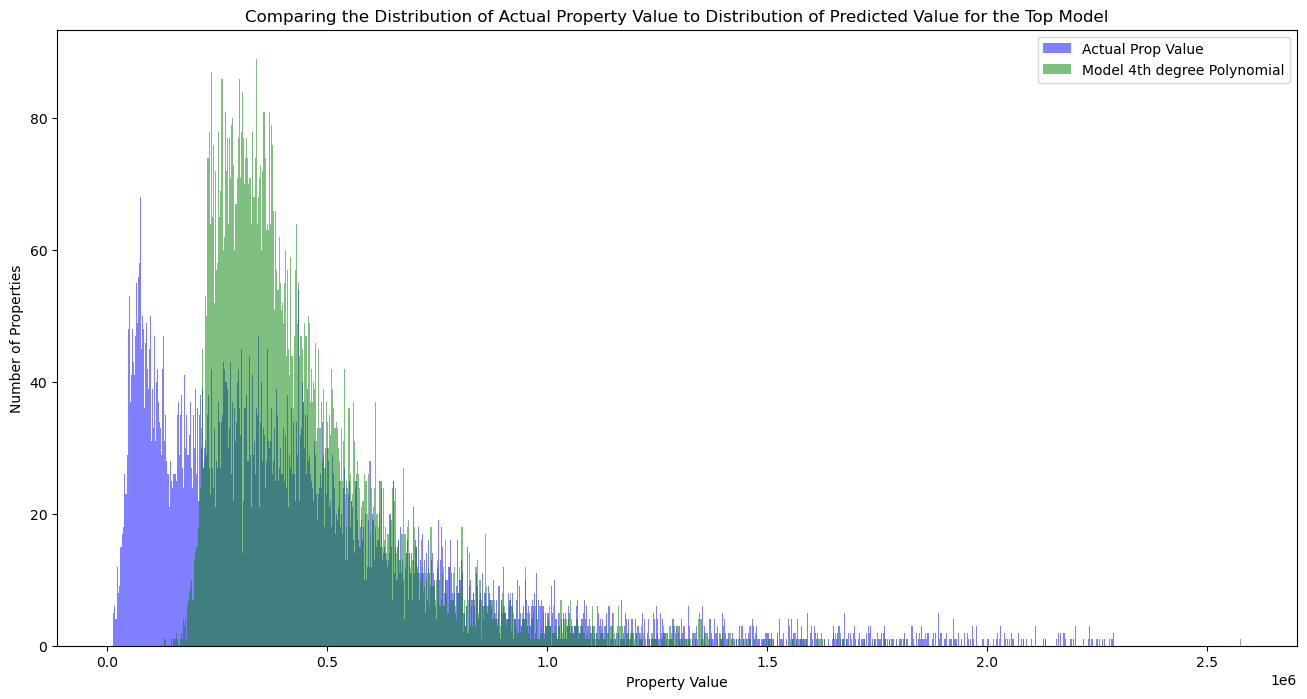

In [77]:
plt.figure(figsize=(16,8))
plt.hist(y_val,bins=1000, color='blue', alpha=.5, label="Actual Prop Value")
plt.hist(pred_pr_v,bins=1000, color='green', alpha=.5, label="Model 4th degree Polynomial")
plt.hist(pred_pr_v,bins=1000, color='green', alpha=.5, label="Model 4th degree Polynomial")
plt.hist(pred_pr_v,bins=1000, color='green', alpha=.5, label="Model 4th degree Polynomial")
plt.xlabel("Property Value")
plt.ylabel("Number of Properties")
plt.title("Comparing the Distribution of Actual Property Value to Distribution of Predicted Value for the Top Model")
plt.legend()
plt.show()